In [1]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

import warnings
warnings.filterwarnings('ignore')

In [2]:
startup = pd.read_csv('/content/50_Startups.csv')
startup.head()  #first five rows

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
startup.tail()  #last five rows

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [ ]:
startup.describe() #returns description of the data in the DataFrame

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
print('There are ',startup.shape[0],'rows and ',startup.shape[1],'columns in the dataset.')

There are  50 rows and  4 columns in the dataset.


In [ ]:
print('There are',startup.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [ ]:
startup.isnull().sum()         #finding null values

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
feature_values = {col:startup[col].nunique() for col in startup.columns} #to find if any feature has only one value
feature_values

{'Administration': 50, 'Marketing Spend': 48, 'Profit': 50, 'R&D Spend': 49}

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in startup.columns if ((startup[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Numerical variables: ', numerical_features)

Numerical variables:  ['R&D Spend', 'Administration', 'Marketing Spend']


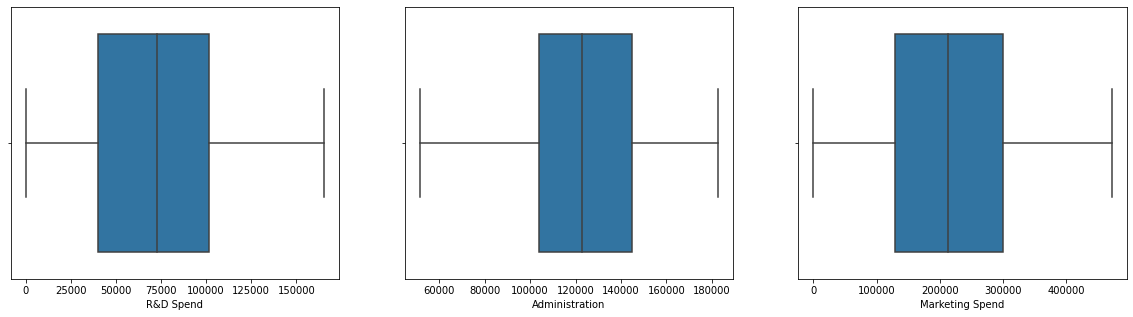

In [ ]:
#boxplot on numerical features to find outliers
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(startup[variable], ax=subplot)

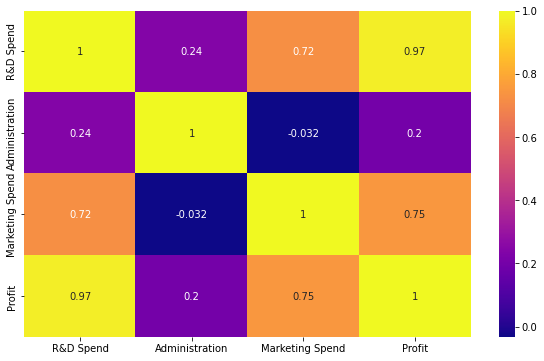

In [ ]:
# Outliers detection in the target variable
plt.figure(figsize=(10, 6))
sns.heatmap(startup.corr(), annot=True, cmap='plasma')
plt.show()

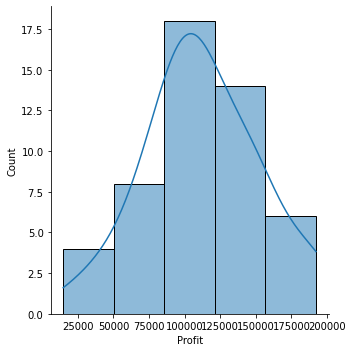

In [ ]:
# Histogram on Profit
sns.displot(startup['Profit'],bins=5,kde=True)
plt.show()

Pair plot

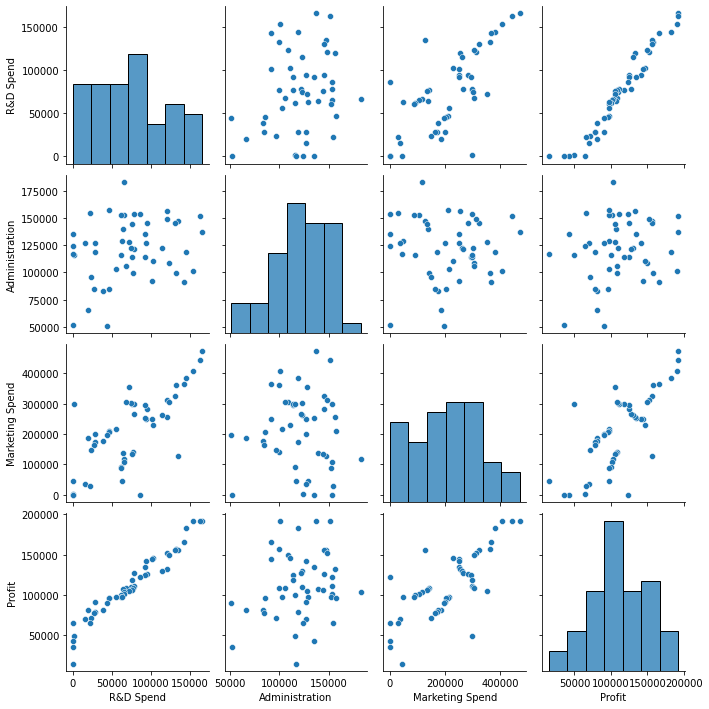

In [ ]:
sns.pairplot(startup)
plt.show()

MODEL SELECTION


In [36]:
# Separate Dependent and Independent Variables
X = startup.drop('Profit',axis=1)
y = startup['Profit']

In [37]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
# import sklearn libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [26]:
# Hyper parameter tuning
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 400, num = 100)],
                'max_features': ['auto', 'sqrt'],
                'max_depth':[int(x) for x in np.linspace(10, 31, num = 11)],
                'min_samples_leaf':[1, 2]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=50)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.932144,"{'copy_X': True, 'fit_intercept': True, 'normalize': False}"
1,lasso,0.932144,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.866695,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.927583,"{'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 127}"


MODEL BUILDING


In [38]:
# Linear Regression
lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [39]:
# fit the model
lr.fit(X_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [40]:
# checking score on test data
lr.score(X_test,y_test)

0.9534585233563451

In [41]:
# predict on test data 
y_pred= lr.predict(X_test)

In [31]:
# PREDICTION
def predict_profit(r_d_expenses,administration_expenses,marketing_expenses):    
    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses

    return lr.predict([x])[0]

In [32]:
# predict on random values 
predict_profit(165349.20,136897.80,471784.10)     	# profit should be 192261.83

192121.36009655602

**COMPARISON BETWEEN ACTUAL AND PREDICTED PROFIT**




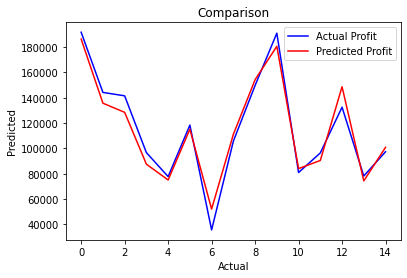

In [ ]:
import matplotlib.pyplot as plt

y_test = np.array(y_test)
y_pred = np.array(y_pred)
plt.plot(y_test,color="blue",label="Actual Profit")
plt.plot(y_pred,color="red",label="Predicted Profit")
plt.title("Comparison")
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 5006.715078028883


In [43]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 95.6710491303467


**SAVE** **MODEL**

In [ ]:
import pickle
# save the model for future use 
pickle.dump(lr,open('startp_profit_prediction_lr_model.pkl','wb'))

In [ ]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))